# Data Mining Project DBM2

For our project did we pick the <a href="http://earthdatascience.org" target="_blank">U.S. Stock Markets 1871-Present and CAPE Ratio</a> data from Robert Shiller. 
The data set consists of monthly stock price, dividends, and earnings data and the consumer price index. It also includes the Cyclically adjusted price-to-earnings (CAPE) ratio, which is used to analyze a company's long-term financial performance. A extremly high value could signal that a company or stock is over-valued (vice versa for low values). In the past, the CAPE ratio could identify potential bubbles or market crashes. 

We start with the data exploration and do then the preprocessing of the data. Then we continue with classification and end with cluster analysis.

***


The data has 20 columns, from which 15 columns are calcuations performed on the first 5 columns. The first column describes the year and month (YYYY-MM). The following 4 columns are 's_and_p_comp', 'dividend', 'earnings' and 'CPI' (Consumer Price Index).

## Data Exploration

Let us take a look at the statistics of the data. 

In [103]:
from pandas.api.types import is_numeric_dtype

##Read excel spread sheet of data
data = pd.read_excel('cleaned_data.xls', header=0)

##Declare the column names
data.columns = ['date', 's_and_p_comp', 'dividend', 'earnings',
                'CPI', 'fraction_date', 'long_interest_rate', 'real_price',
                'real_dividend', 'real_total_return_price','real_earnings',
                'real_scaled_earnings', 'CAPE', 'TR_CAPE', 'excess_CAPE', 'montly_bond_return',
                'real_bond_return','10_year_stock_return', '10_year_bond_return',
                '10_year_excess_return']


for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

s_and_p_comp:
	 Mean = 326.10
	 Standard deviation = 680.61
	 Minimum = 2.73
	 Maximum = 4493.28
dividend:
	 Mean = 6.67
	 Standard deviation = 11.92
	 Minimum = 0.00
	 Maximum = 59.68
earnings:
	 Mean = 15.37
	 Standard deviation = 28.93
	 Minimum = 0.16
	 Maximum = 158.74
CPI:
	 Mean = 62.28
	 Standard deviation = 76.14
	 Minimum = 6.28
	 Maximum = 273.98
fraction_date:
	 Mean = 1946.37
	 Standard deviation = 43.53
	 Minimum = 1871.04
	 Maximum = 2021.71
long_interest_rate:
	 Mean = 4.51
	 Standard deviation = 2.30
	 Minimum = 0.62
	 Maximum = 15.32
real_price:
	 Mean = 622.51
	 Standard deviation = 732.33
	 Minimum = 74.16
	 Maximum = 4493.28
real_dividend:
	 Mean = 17.47
	 Standard deviation = 11.06
	 Minimum = 0.00
	 Maximum = 63.74
real_total_return_price:
	 Mean = 219499.51
	 Standard deviation = 445435.17
	 Minimum = 96.45
	 Maximum = 2851341.69
real_earnings:
	 Mean = 34.97
	 Standard deviation = 29.96
	 Minimum = 0.00
	 Maximum = 160.08
real_scaled_earnings:
	 Mean = 10429.95

It is visible, that the 's_and_p_comp', 'real_price', 'real_total_return_price' and 'real_scaled_earnings' have very high standard deviations, which could be a sign, that they are accumulated or at least grow over time. 
***
We can not exclude many insights from the covariance, but the correlation is interesting. We see that certain rows have a very high correlation. This is due to the calcuations that are performed on the first rows. 

In [106]:
print('Correlation:')
data.corr()

Correlation:


,s_and_p_comp,dividend,earnings,CPI,fraction_date,long_interest_rate,real_price,real_dividend,real_total_return_price,real_earnings,real_scaled_earnings,CAPE,TR_CAPE,excess_CAPE,montly_bond_return,real_bond_return,10_year_stock_return,10_year_bond_return,10_year_excess_return
s_and_p_comp,1.000000,0.960208,0.963338,0.890046,0.664001,-0.162096,0.975419,0.844839,0.999271,0.856769,0.962889,0.684555,0.618474,-0.197140,0.012000,0.911428,-0.127689,0.103931,-0.209542
dividend,0.960208,1.000000,0.953237,0.921980,0.715211,-0.081553,0.933683,0.947536,0.960250,0.896982,0.955125,0.594726,0.521842,-0.171895,0.025394,0.927516,0.000203,0.153138,-0.111121
earnings,0.963338,0.953237,1.000000,0.914580,0.701517,-0.088769,0.938764,0.890930,0.960652,0.955013,0.998671,0.620251,0.547799,-0.180508,0.036849,0.918028,-0.036831,0.142555,-0.142287
CPI,0.890046,0.921980,0.914580,1.000000,0.841646,0.113152,0.907531,0.874520,0.893302,0.888844,0.920282,0.611836,0.527218,-0.185415,0.068810,0.939546,0.037240,0.208018,-0.112158
fraction_date,0.664001,0.715211,0.701517,0.841646,1.000000,0.255902,0.749783,0.818805,0.678179,0.806709,0.724594,0.450187,0.362360,-0.038943,0.058092,0.811841,-0.026860,-0.103420,0.047005
long_interest_rate,-0.162096,-0.081553,-0.088769,0.113152,0.255902,1.000000,-0.090458,0.032500,-0.146617,0.059767,-0.061810,-0.202208,-0.244959,0.040772,0.187713,-0.179335,0.104918,0.476997,-0.236698
real_price,0.975419,0.933683,0.938764,0.907531,0.749783,-0.090458,1.000000,0.880984,0.980910,0.891587,0.946115,0.776126,0.707537,-0.278491,0.010004,0.919173,-0.296282,-0.010431,-0.303301
real_dividend,0.844839,0.947536,0.890930,0.874520,0.818805,0.032500,0.880984,1.000000,0.855115,0.918526,0.904794,0.583268,0.505835,-0.204936,0.019039,0.879256,-0.210272,-0.077740,-0.164117
real_total_return_price,0.999271,0.960250,0.960652,0.893302,0.678179,-0.146617,0.980910,0.855115,1.000000,0.863367,0.962063,0.693941,0.627340,-0.204420,0.012004,0.912071,-0.148111,0.092607,-0.222738
real_earnings,0.856769,0.896982,0.955013,0.888844,0.806709,0.059767,0.891587,0.918526,0.863367,1.000000,0.964747,0.609694,0.529626,-0.179847,0.037102,0.871466,-0.145535,0.006318,-0.157301


***

If we now take a look at the joint distribution. The first three graphs are rather obvious, as we look at the 'date' and another column, where the attribute grows over time. In the last three graphs we can see the correlation, we have seen before.

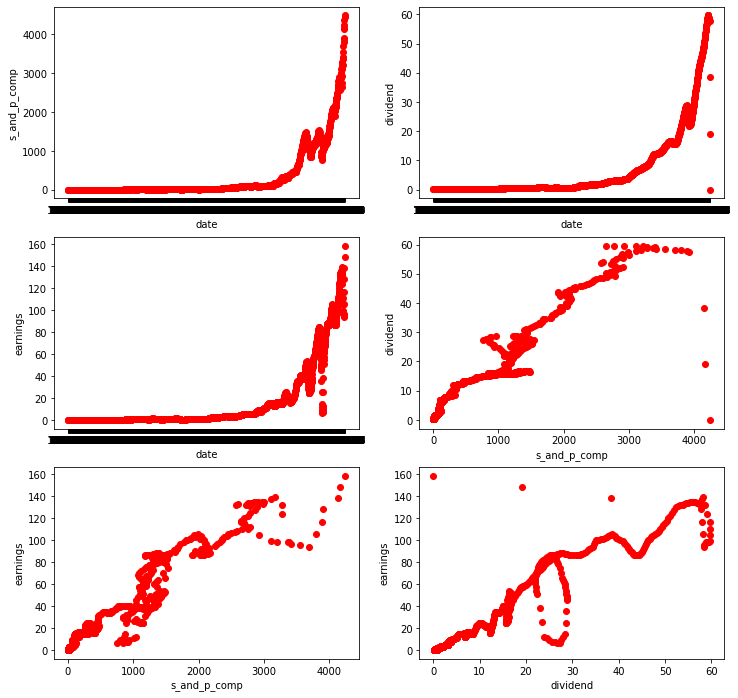

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

## Preprocessing
***

### Data Quality Issues
First, we read the excel-file and define the columns. 

In [14]:
import pandas as pd
import numpy as np

##Read excel spread sheet of data
data = pd.read_excel('cleaned_data.xls', header=0)

##Declare the column names
data.columns = ['date', 's_and_p_comp', 'dividend', 'earnings',
                'CPI', 'fraction_date', 'long_interest_rate', 'real_price',
                'real_dividend', 'real_total_return_price','real_earnings',
                'real_scaled_earnings', 'CAPE', 'TR_CAPE', 'excess_CAPE', 'montly_bond_return',
                'real_bond_return','10_year_stock_return', '10_year_bond_return',
                '10_year_excess_return']

We replace all 'NA' rows with NAN type. 
Then we dropped the '10_year_stock_return', '10_year_bond_return' and '10_year_excess_return', as the last rows do not yet exist and we decided to perform our analysis with the rest of the data. 
In the data were no missing values, which simplified our preprocessing step considerably.

In [15]:

##Replaces all 'NA' rows with NAN type
data = data.replace('NA',np.NaN)

data.head()

##Drop "10 year" columns so there are no rows with missing data after 2011   
data = data.drop(['10_year_stock_return'],axis=1)
data = data.drop(['10_year_bond_return'],axis=1)
data = data.drop(['10_year_excess_return'],axis=1)

##Drop rows with missing data
print('\n\nNumber of rows in original data = %d' % (data.shape[0]))
data = data.dropna()
print('Number of rows after discarding missing values = %d\n' % (data.shape[0]))

#Number
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

##Check to make sure there are no missing values in each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))




Number of rows in original data = 1809
Number of rows after discarding missing values = 1686

Number of instances = 1686
Number of attributes = 17

Number of missing values:
	date: 0
	s_and_p_comp: 0
	dividend: 0
	earnings: 0
	CPI: 0
	fraction_date: 0
	long_interest_rate: 0
	real_price: 0
	real_dividend: 0
	real_total_return_price: 0
	real_earnings: 0
	real_scaled_earnings: 0
	CAPE: 0
	TR_CAPE: 0
	excess_CAPE: 0
	montly_bond_return: 0
	real_bond_return: 0


## Outliers

We took a look at possible outliers. The inital step was to exclude the 'date, 'fraction_date'. We also decided to exclude the 'real_total_return_price', 'real_scaled_earnings', 'earnings' and 'real_earnings' as it is an accumulation. The 's_and_p_comp', 'real_price', 'real_bond_return', 'dividend', 'real_dividend' and 'CPI' are also variables which increased over time, so they were excluded too.

<AxesSubplot:>

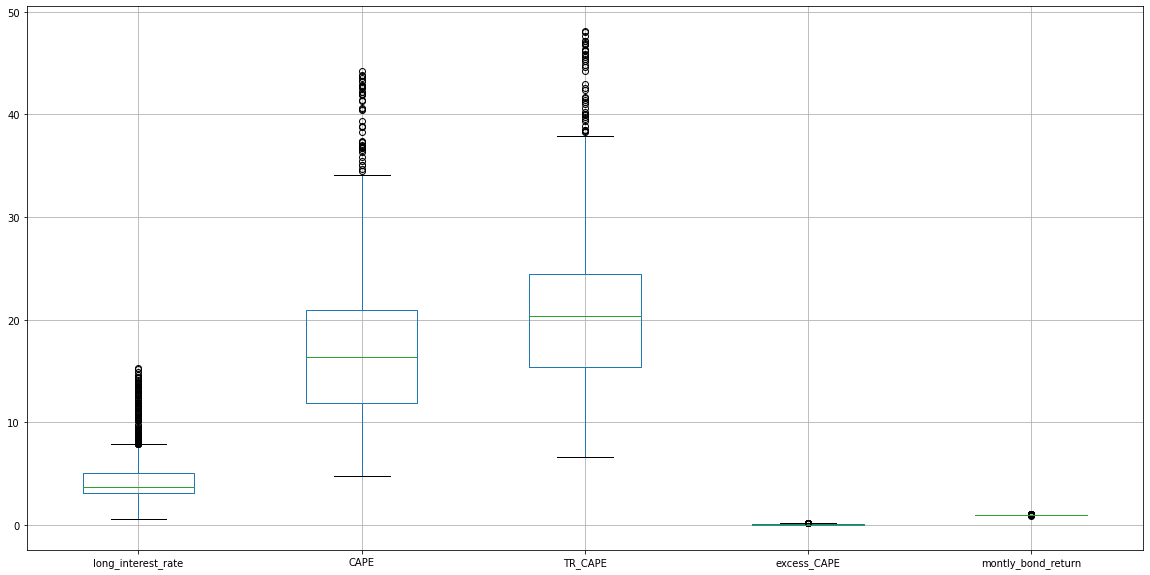

In [41]:
%matplotlib inline

data_bp = data

data_bp = data_bp.drop(['date'], axis=1)
data_bp = data_bp.drop(['fraction_date'], axis=1)

data_bp = data_bp.drop(['real_total_return_price'], axis=1)
data_bp = data_bp.drop(['real_scaled_earnings'], axis=1)
data_bp = data_bp.drop(['earnings'], axis=1)
data_bp = data_bp.drop(['real_earnings'], axis=1)

data_bp = data_bp.drop(['s_and_p_comp'], axis=1)
data_bp = data_bp.drop(['real_price'], axis=1)
data_bp = data_bp.drop(['real_bond_return'], axis=1)
data_bp = data_bp.drop(['dividend'], axis=1)
data_bp = data_bp.drop(['real_dividend'], axis=1)
data_bp = data_bp.drop(['CPI'], axis=1)

for row in data_bp.columns:
    data_bp[row] = pd.to_numeric(data_bp[row])
        
data_bp.boxplot(figsize=(20,10))

The 'CAPE and 'TR_CAPE' are ratios, which are infaltion-adjusted. So there should be outliers. In the last years  (>2000) they grew stronger than in the years before, which explains the points higher than the maximum of the boxplot. The same reasoning occurs to the long_interest_rate.

*** 

If we look only at the 'montly_bond_return' before 1921, we do not have outliers, but after that we do. Especially the bull stock market starting from 1922 highly increased the 'montly_bond_return' and resulted in the crash from 1929. At the start of the Second World War, the 'montly_bond_return' had strong losses. 

<AxesSubplot:>

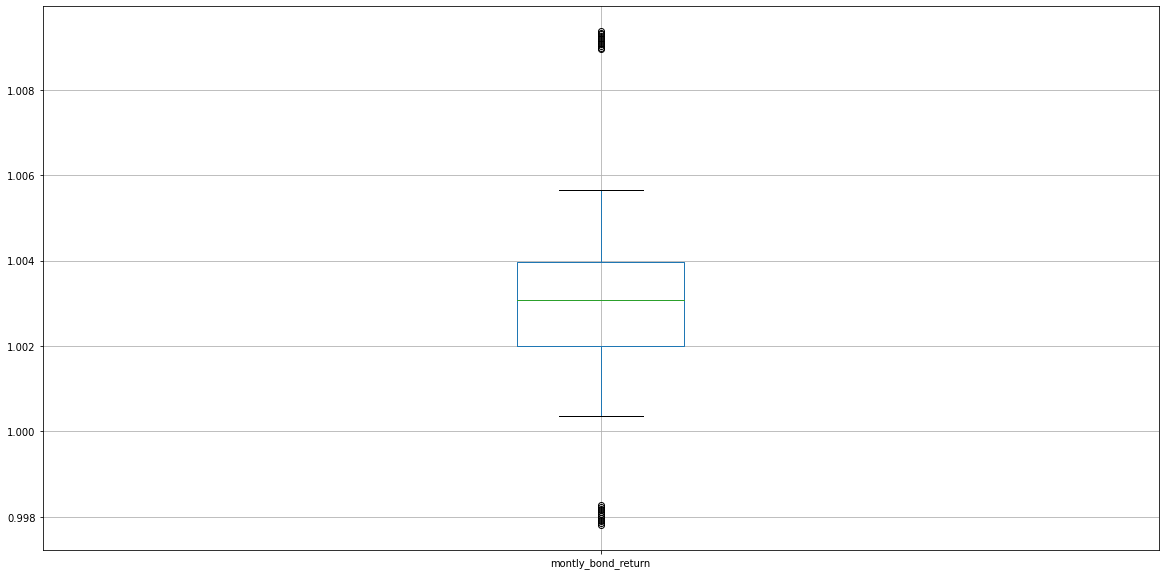

In [95]:
data_bp2 = data[(data['date'] < '1945')]

data_bp2 = data_bp2.drop(['date'], axis=1)
data_bp2 = data_bp2.drop(['fraction_date'], axis=1)
data_bp2 = data_bp2.drop(['real_total_return_price'], axis=1)
data_bp2 = data_bp2.drop(['real_scaled_earnings'], axis=1)
data_bp2 = data_bp2.drop(['earnings'], axis=1)
data_bp2 = data_bp2.drop(['real_earnings'], axis=1)
data_bp2 = data_bp2.drop(['s_and_p_comp'], axis=1)
data_bp2 = data_bp2.drop(['real_price'], axis=1)
data_bp2 = data_bp2.drop(['real_bond_return'], axis=1)
data_bp2 = data_bp2.drop(['dividend'], axis=1)
data_bp2 = data_bp2.drop(['real_dividend'], axis=1)
data_bp2 = data_bp2.drop(['CPI'], axis=1)
data_bp2 = data_bp2.drop(['CAPE'], axis=1)
data_bp2 = data_bp2.drop(['TR_CAPE'], axis=1)
data_bp2 = data_bp2.drop(['long_interest_rate'], axis=1)
data_bp2 = data_bp2.drop(['excess_CAPE'], axis=1)

for row in data_bp2.columns:
    data_bp2[row] = pd.to_numeric(data_bp2[row])
        
data_bp2.boxplot(figsize=(20,10))

For our data it does not make sense to exclude outliers, as they give us the most interesting insight.
***
## Aggregation

Here we take a look at the graphic visualization of the data for the 's_and_p_comp'. The same can be done with other columns. We see that the highest increases occured after the 1990s, under the regency of Ronald Reagan.


Text(0.5, 1.0, 'Daily Precipitation (variance = 459332.9033)')

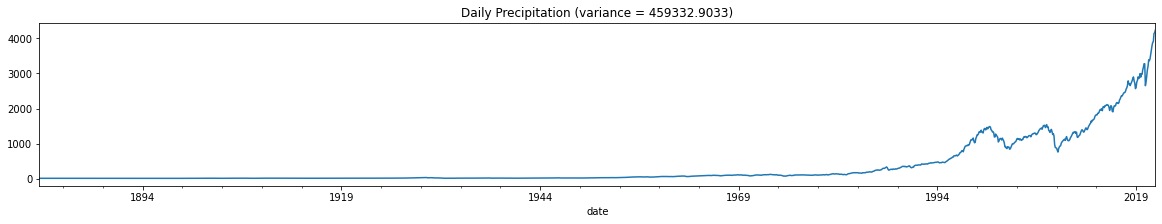

In [96]:
daily = data
daily.index = pd.to_datetime(daily['date'])

daily = daily['s_and_p_comp']
ax = daily.plot(kind='line',figsize=(20,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 61954581.4169)')

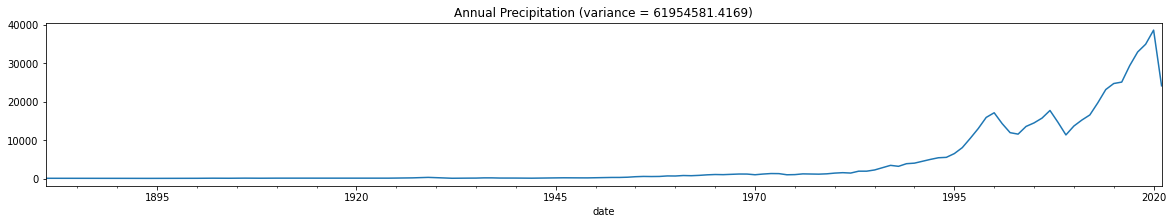

In [97]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
annual = monthly.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(20,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

***
If we take a look at the CAPE ratio, we see the biggest increases and fallbacks between 1922-29, at the dot-com bubble in the 2000 and the financial crisis from 2009. 

Text(0.5, 1.0, 'Daily Precipitation (variance = 48.8616)')

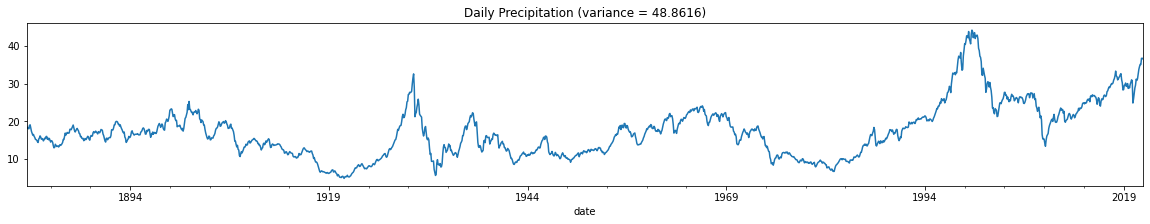

In [99]:
daily = data
daily.index = pd.to_datetime(daily['date'])

daily = daily['CAPE']
ax = daily.plot(kind='line',figsize=(20,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

## Sampling
For our data set, random sampling does not make sense since we are looking at fincial change over *time*. Instead, our sample is a random 10 conescutive rows of data.

import random
randomIndex = random.randint(0,data.shape[0])
sample = data[randomIndex:randomIndex+10]
sample

## Discretization

Here we transform the continuous attribute 'real_price' in categories. We can already see, that the highest occurence is for a 'real_price' below 1000.

180.048915     1
177.672135     1
179.687864     1
177.339692     1
187.174859     1
              ..
4045.394349    1
4044.948268    1
4248.627287    1
4241.984255    1
4274.170914    1
Name: real_price, Length: 1668, dtype: int64

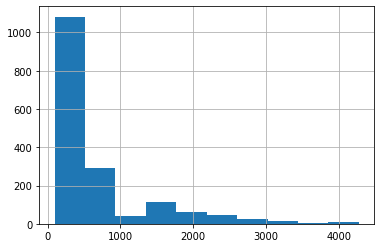

In [101]:
data['real_price'].hist(bins=10)
data['real_price'].value_counts(sort=False)

***
If we order it into bins this can be also seen.

In [37]:
bins = pd.cut(data['real_price'],4)
bins.value_counts(sort=False)

(91.918, 1140.614]      1389
(1140.614, 2185.133]     197
(2185.133, 3229.652]      83
(3229.652, 4274.171]      17
Name: real_price, dtype: int64

In [38]:
bins = pd.qcut(data['real_price'],4)
bins.value_counts(sort=False)

(96.095, 198.301]      422
(198.301, 310.217]     421
(310.217, 737.047]     421
(737.047, 4274.171]    422
Name: real_price, dtype: int64